In [1]:
suppressPackageStartupMessages({
  library(Seurat)
  library(monocle3)
  library(SeuratWrappers)
  library(dplyr)
  library(Matrix)
  library(ggplot2)
  library(patchwork)
  library(SingleCellExperiment)
})

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”


Warning message:
“package ‘matrixStats’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘Matrix’ was built under R version 4.4.3”
Warning message:
“package ‘patchwork’ was built under R version 4.4.3”


In [2]:
adult_obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/annotated/myeloid_clean_annotated.rds')
adult_obj

An object of class Seurat 
69212 features across 94270 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [3]:
table(adult_obj$general_cell_type)


       C1Q_MHCII_TAM       HSP_stress_TAM          Hypoxic_TAM 
               22753                 1306                10159 
             IFN_TAM     Inflammatory_TAM MERT_Homeostatic_TAM 
                9421                 7800                25707 
            Monocyte           Neutrophil             SPP1_TAM 
                5158                 6503                 5463 

In [4]:
malignant_obj <- subset(
  adult_obj,
  subset = general_cell_type != 'Neutrophil'
)

dim(malignant_obj)

[1] 30606 87767

In [5]:
malignant_obj@meta.data |> head(2)
malignant_obj$general_cell_type |> unique()
malignant_obj

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,PRJNA1125010,1175,713,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,10.978723,singlet,⋯,0,0,0,0,0,0,0,0,0,C1Q_MHCII_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,PRJNA1125010,4284,2090,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.960784,singlet,⋯,4,6,6,6,6,7,3,4,4,MERT_Homeostatic_TAM


[1] "C1Q_MHCII_TAM"        "MERT_Homeostatic_TAM" "Hypoxic_TAM"         
[4] "SPP1_TAM"             "Monocyte"             "Inflammatory_TAM"    
[7] "IFN_TAM"              "HSP_stress_TAM"

An object of class Seurat 
69212 features across 87767 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [6]:
DefaultAssay(malignant_obj) <- "SCT"  # critical for as.cell_data_set()

In [7]:
cds <- as.cell_data_set(malignant_obj)

cds

Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


class: cell_data_set 
dim: 30606 87767 
metadata(0):
assays(2): counts logcounts
rownames(30606): ENSG00000238009 ENSG00000241860 ... ENSG00000287806
  AVPR2
rowData names(0):
colnames(87767):
  PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1
  PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1
  ...
  PRJNA995768__PRJNA995768__filtered_feature_bc_matrix__SAMN36505073_TTTGTCAAGGCGACAT-1
  PRJNA995768__PRJNA995768__filtered_feature_bc_matrix__SAMN36505073_TTTGTCACATGTCCTC-1
colData names(36): orig.ident nCount_RNA ... ident Size_Factor
reducedDimNames(3): PCA HARMONY UMAP.HARMONY
mainExpName: SCT
altExpNames(0):

In [8]:
head(colnames(cds))
head(rownames(cds))

colData(cds) |> as.data.frame() |> head()
rowData(cds) |> as.data.frame() |> head()

[1] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1"
[2] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1"
[3] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1"
[4] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1"
[5] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1"
[6] "PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1"

[1] "ENSG00000238009" "ENSG00000241860" "ENSG00000290385" "ENSG00000291215"
[5] "LINC01409"       "ENSG00000290784"

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type,ident,Size_Factor
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<dbl>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,PRJNA1125010,1175,713,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,10.9787234,singlet,⋯,0,0,0,0,0,0,0,C1Q_MHCII_TAM,C1Q_MHCII_TAM,4476
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,PRJNA1125010,4284,2090,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.9607843,singlet,⋯,6,6,6,7,3,4,4,MERT_Homeostatic_TAM,MERT_Homeostatic_TAM,5278
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1,PRJNA1125010,44655,6053,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,3.7509797,singlet,⋯,18,18,17,19,20,28,28,C1Q_MHCII_TAM,C1Q_MHCII_TAM,6484
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1,PRJNA1125010,29414,6000,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.6114775,singlet,⋯,6,6,6,7,3,4,4,MERT_Homeostatic_TAM,MERT_Homeostatic_TAM,6345
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1,PRJNA1125010,3246,1661,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.8934073,singlet,⋯,15,15,15,15,12,14,14,Hypoxic_TAM,Hypoxic_TAM,4914
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1,PRJNA1125010,10869,3658,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,12.9358727,singlet,⋯,2,2,1,1,1,1,1,MERT_Homeostatic_TAM,MERT_Homeostatic_TAM,6872


ENSG00000238009
ENSG00000241860
ENSG00000290385
ENSG00000291215
LINC01409
ENSG00000290784


In [9]:
if (is.null(rowData(cds)$gene_short_name)) {
  rowData(cds)$gene_short_name <- rownames(cds)
}

In [10]:
# Ensure the same cells (order) in Seurat and CDS
all(colnames(malignant_obj) == colnames(cds))
# If FALSE, reorder:

cds <- cds[, colnames(malignant_obj)]

[1] TRUE

In [11]:
# Extract Harmony embeddings
harm <- Embeddings(malignant_obj, "harmony")  # matrix: cells x dims
dim(harm)
head(harm[, 1:5])

[1] 87767    50

,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,-15.853236,-3.342554,-3.621113,-0.5052105,2.643085
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,22.125178,9.117247,6.421647,-8.5346568,14.700782
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1,8.980117,8.632856,-10.406330,4.7819766,19.964667
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1,5.923652,6.077793,5.129676,-2.6559370,11.818529
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1,-32.005983,60.602893,9.543225,-9.7325562,-9.457936
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1,12.945955,-8.079107,7.518873,-12.7057660,9.907307


In [12]:
num_dim <- min(50, ncol(harm))
harm_use <- harm[, 1:num_dim]

In [13]:
cds <- preprocess_cds(
  cds,
  num_dim = num_dim,                # same as Harmony
  method = "PCA",
  norm_method = "log"               # fine for SCT
)

In [14]:
reducedDims(cds)$PCA <- harm_use

In [15]:
umap_harm <- Embeddings(malignant_obj, "umap.harmony")
reducedDims(cds)$UMAP <- umap_harm

In [ ]:
# cds <- reduce_dimension(
#   cds,
#   reduction_method   = "UMAP",
#   preprocess_method  = "PCA",
#   umap.metric        = "cosine",
#   umap.min_dist      = 0.1,
#   umap.n_neighbors   = 30L
# )

In [16]:
cds <- cluster_cells(
  cds,
  reduction_method = "UMAP",
  k = 20          # adjust; smaller = fewer, bigger = more clusters
)

table(partitions(cds))
table(clusters(cds))


    1     2 
87670    97 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
5664 5099 4912 4869 4461 4373 4010 3812 3774 3606 3194 3182 2969 2928 2718 2663 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
2536 2453 2415 2092 2057 2039 1988 1775 1669 1666 1344 1262 1171  944   97   25 

In [17]:
cds <- learn_graph(
  cds,
  use_partition = TRUE,     # or FALSE if you want one global trajectory
  close_loop = FALSE        # TRUE if you suspect cycles
)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the monocle3 package.
  Please report the issue to the authors.”


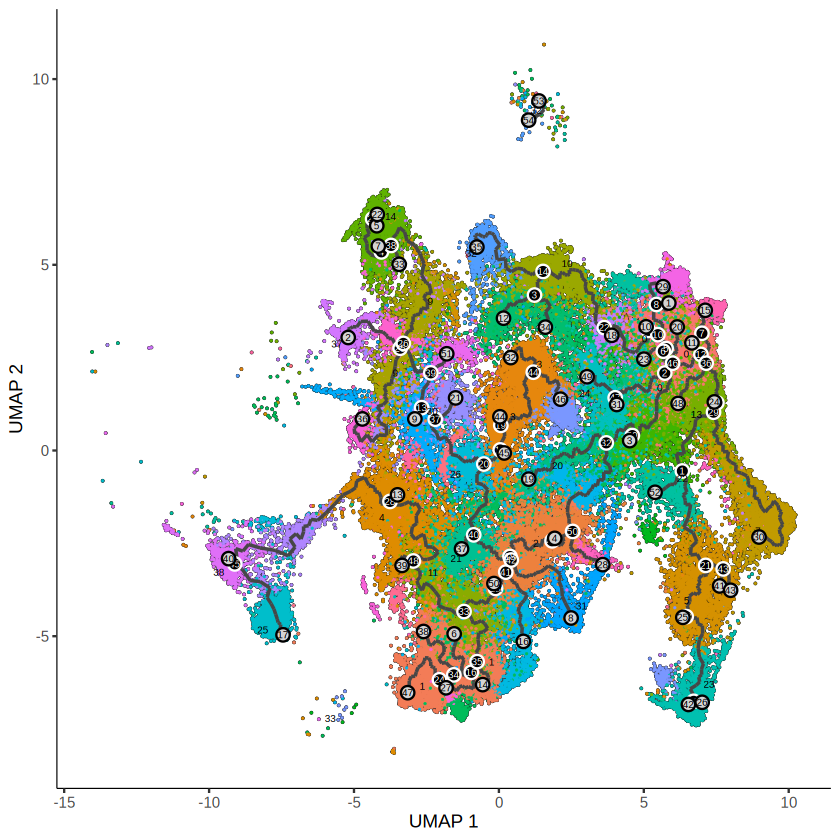

In [18]:
plot_cells(
  cds,
  color_cells_by = "seurat_clusters",  # or any meta column
  label_groups_by_cluster = TRUE,
  label_leaves = TRUE,
  label_branch_points = TRUE
)

In [19]:
get_earliest_principal_node <- function(cds, time_bin="Monocyte"){
  cell_ids <- which(colData(cds)[, "general_cell_type"] == time_bin)

  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])

  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[
      as.numeric(names(which.max(table(closest_vertex[cell_ids, ]))))
    ]

  root_pr_nodes
}

cds <- order_cells(cds, root_pr_nodes = get_earliest_principal_node(cds))


In [ ]:
# table(colData(cds)$general_cell_type)

# root_cells <- colnames(cds)[cds$general_cell_type == "OPC_like"]

# length(root_cells)

# cds <- order_cells(
#   cds,
#   root_cells = root_cells
# )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   20.86   28.57     Inf   34.09     Inf 

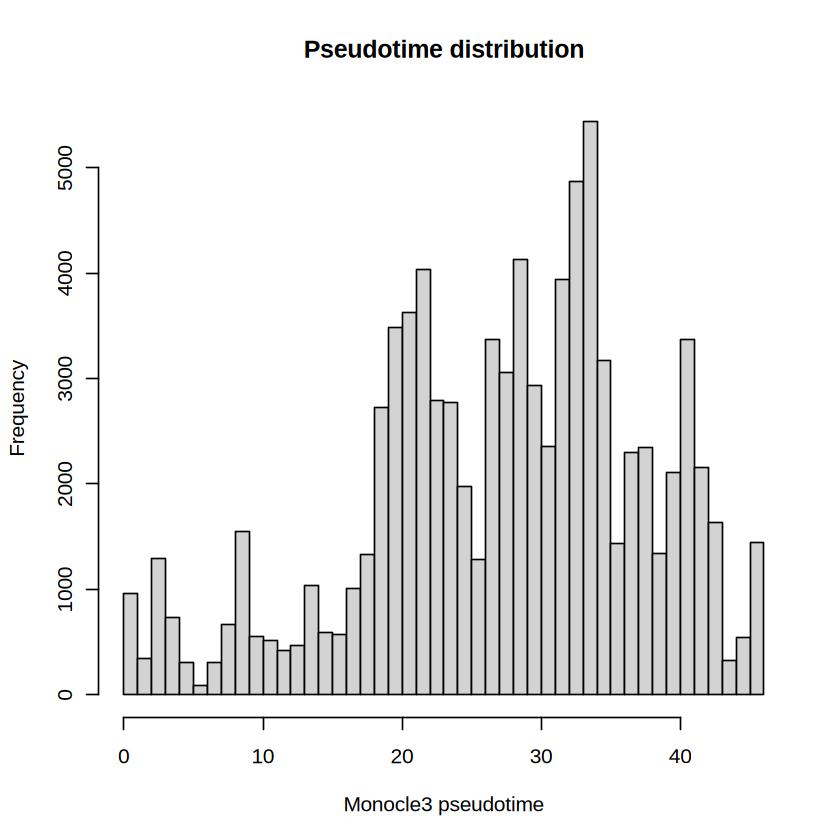

In [20]:
pseudo <- pseudotime(cds)
summary(pseudo)

# Example: show distribution
hist(pseudo, breaks = 50, main = "Pseudotime distribution", xlab = "Monocle3 pseudotime")

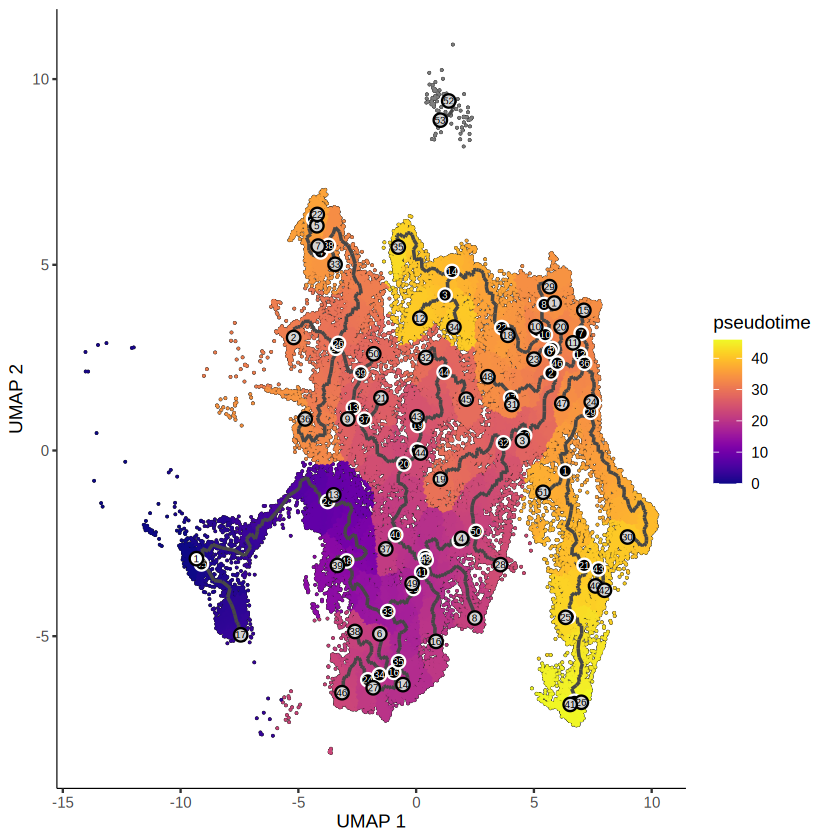

In [21]:
plot_cells(
  cds,
  color_cells_by = "pseudotime",
  label_cell_groups = FALSE,
  label_leaves = TRUE,
  label_branch_points = TRUE
)

In [22]:
p1 <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  group_cells_by = "general_cell_type",
  label_cell_groups = TRUE,
  label_leaves = FALSE,
  label_branch_points = FALSE
)

p2 <- plot_cells(
  cds,
  color_cells_by = "general_cell_type",
  label_cell_groups = TRUE,
  label_leaves = FALSE,
  label_branch_points = FALSE
)

p1 + p2

ERROR: Error in match.arg(group_cells_by): 'arg' should be one of “cluster”, “partition”


Cells aren't colored in a way that allows them to be grouped.



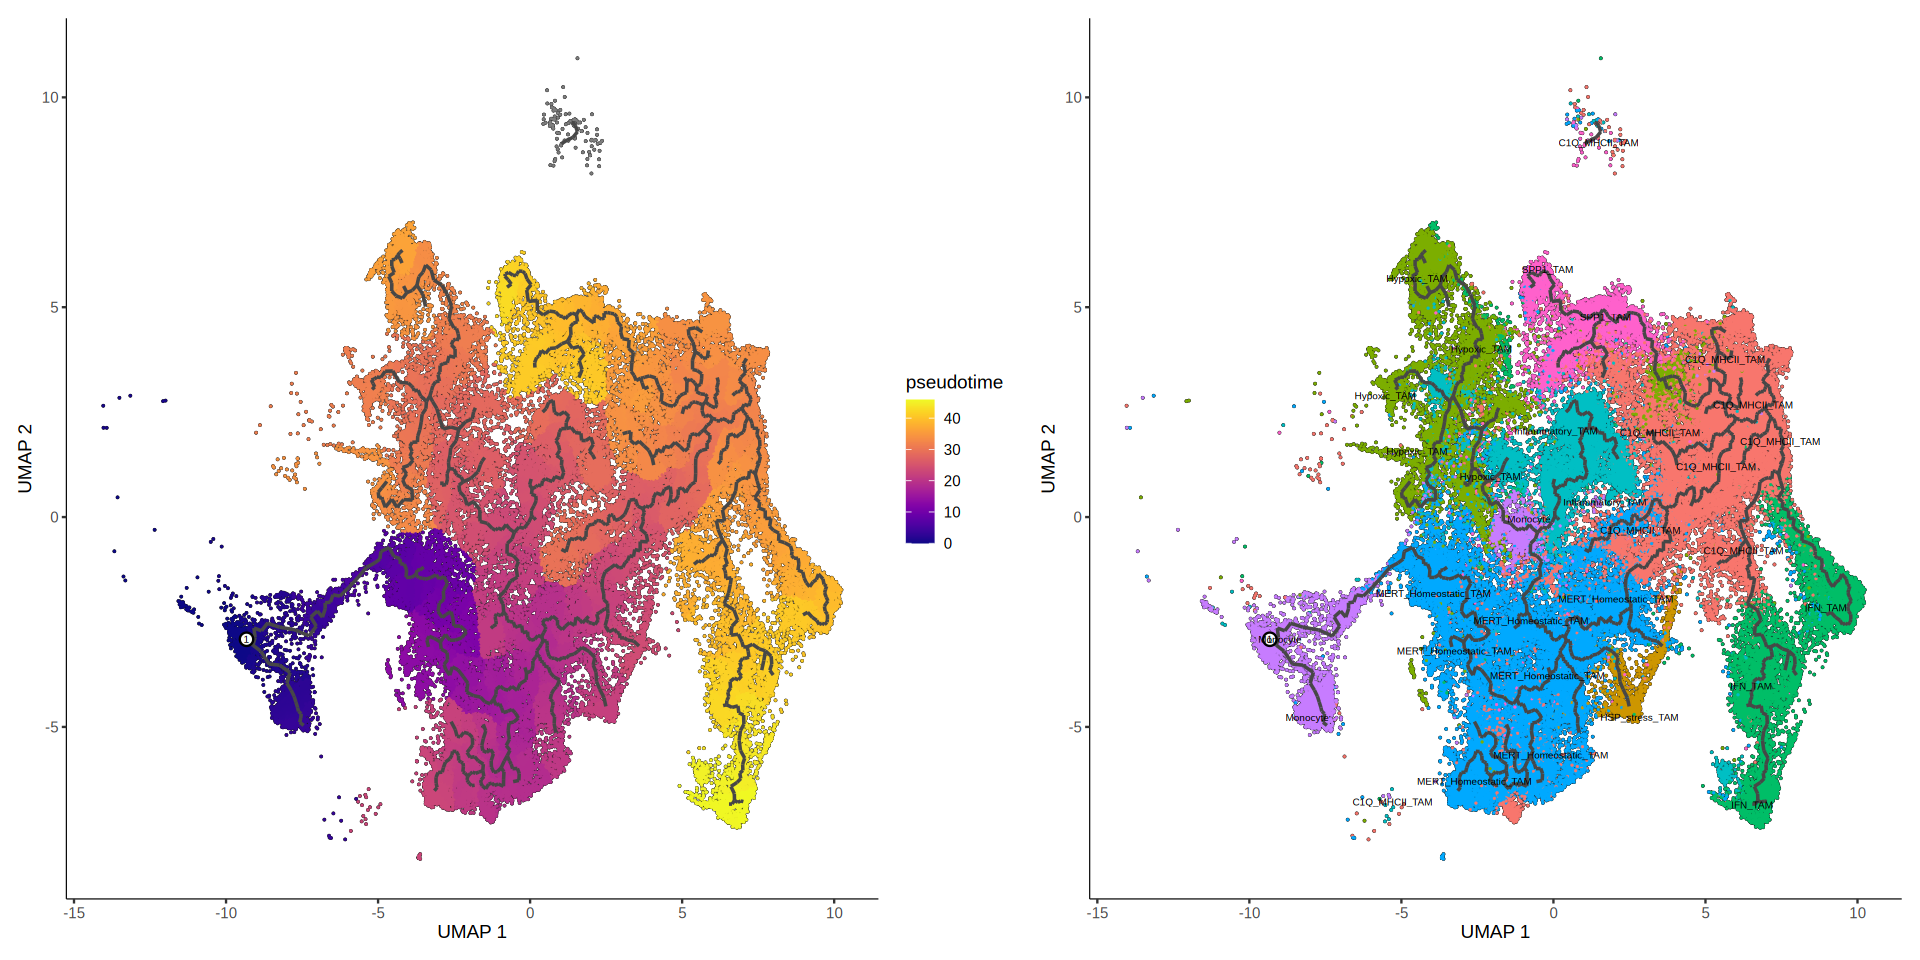

In [24]:
p1_corrected <- plot_cells(
  cds,
  color_cells_by = "pseudotime",
  # REMOVE group_cells_by to avoid the error
  label_cell_groups = TRUE, # Will label based on the color_cells_by variable
  label_leaves = FALSE,
  label_branch_points = FALSE
)

p2 <- plot_cells(
  cds,
  color_cells_by = "general_cell_type",
  label_cell_groups = TRUE,
  label_leaves = FALSE,
  label_branch_points = FALSE
)

options(repr.plot.width = 16, repr.plot.height = 8)
p1_corrected + p2